In [1]:
from Metaheuristicas.fitness_functions import *


In [2]:
X, y = load_and_preprocess_data(filename='Resources/SeisBenchV1_v1_1.json')


In [3]:
from Metaheuristicas.Simmulated_Annealing import simulated_annealing

cooling_rate = 0.95
max_iter = 680

In [4]:
import pandas as pd
from IPython.display import display, clear_output

# Step 1: Initialize empty DataFrames for each classifier with metrics as columns
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

naive_bayes_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
random_forest_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
neural_network_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])

# Display all tables function
def display_tables():
    clear_output(wait=True)
    print("Naive Bayes Results")
    display(naive_bayes_df)
    print("Random Forest Results")
    display(random_forest_df)
    print("Neural Network Results")
    display(neural_network_df)

In [5]:
def add_result(classifier, fitness_function, accuracy, precision, recall, f1_score, auc):
    new_data = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score,
        "AUC": auc
    }

    if classifier == "Naive Bayes":
        global naive_bayes_df
        naive_bayes_df.loc[fitness_function] = new_data
    elif classifier == "Random Forest":
        global random_forest_df
        random_forest_df.loc[fitness_function] = new_data
    elif classifier == "Neural Network":
        global neural_network_df
        neural_network_df.loc[fitness_function] = new_data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def confusion_matrix_heatmap(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

#### Models Naive Bayes and Decision Tree

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
DT = RandomForestClassifier()

#dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# SA with Mutual Information


In [8]:
best_solution, best_Gfitness = simulated_annealing(X, y, initial_temperature=1, cooling_rate=cooling_rate,max_iter=max_iter ,fitness_function=mutual_information_eval)
SAMIFeatures = X.columns[best_solution.astype(bool)].tolist()

In [9]:
NB.fit(X_train[SAMIFeatures], y_train)

y_pred = NB.predict(X_test[SAMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))


Accuracy: 0.9302325581395349
Precision: 0.4864864864864865
Recall: 0.782608695652174
F1: 0.6000000000000001
AUC: 0.861709332249763


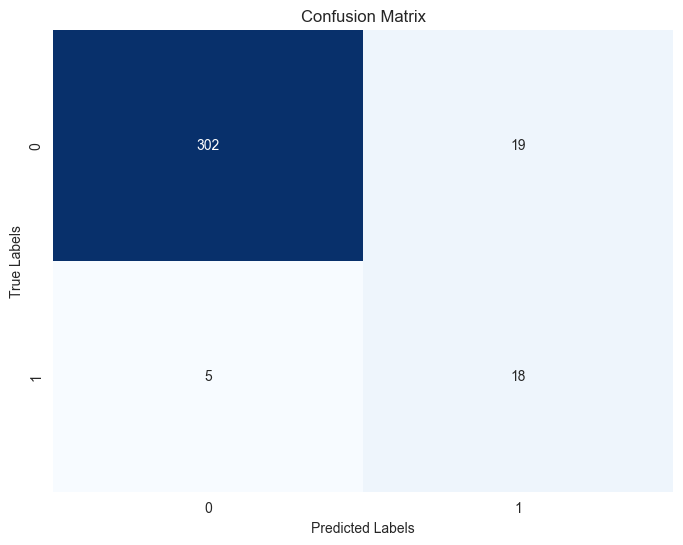

In [10]:
confusion_matrix_heatmap(y_test, y_pred)

In [11]:
DT.fit(X_train[SAMIFeatures], y_train)

y_pred = DT.predict(X_test[SAMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9709302325581395
Precision: 0.8421052631578947
Recall: 0.6956521739130435
F1: 0.761904761904762
AUC: 0.8431531897602601


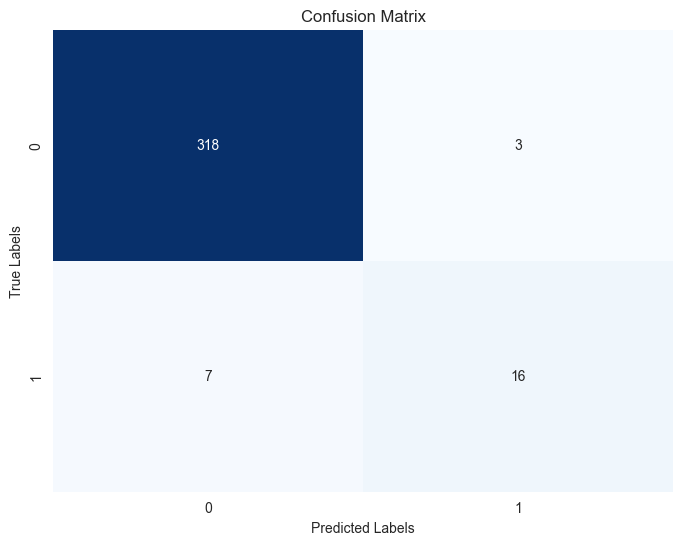

In [12]:
confusion_matrix_heatmap(y_test, y_pred)

# SA with Chi2

In [13]:
best_solution, best_Gfitness = simulated_annealing(X, y, initial_temperature=1, cooling_rate=cooling_rate,max_iter=max_iter ,fitness_function=mutual_information_eval)
SAX2Features = X.columns[best_solution.astype(bool)].tolist()

In [14]:
NB.fit(X_train[SAX2Features], y_train)
y_pred = NB.predict(X_test[SAX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9331395348837209
Precision: 0.5
Recall: 0.782608695652174
F1: 0.6101694915254238
AUC: 0.8632669646485168


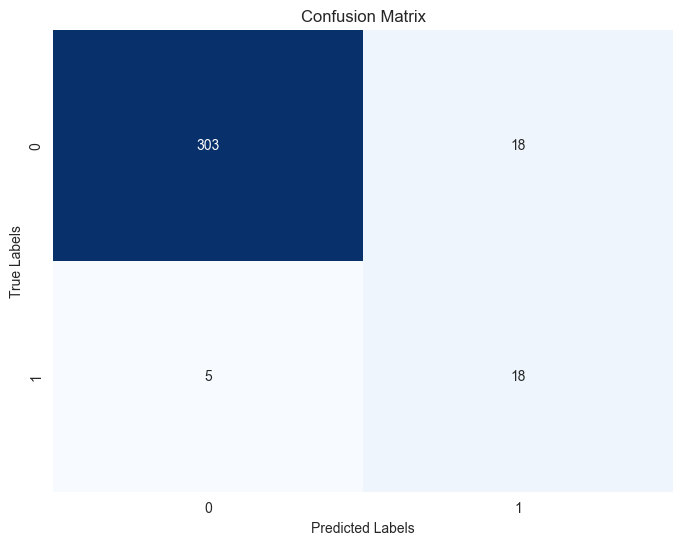

In [15]:
confusion_matrix_heatmap(y_test, y_pred)

In [16]:
DT.fit(X_train[SAX2Features], y_train)
y_pred = DT.predict(X_test[SAX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9622093023255814
Precision: 0.7272727272727273
Recall: 0.6956521739130435
F1: 0.711111111111111
AUC: 0.8384802925639984


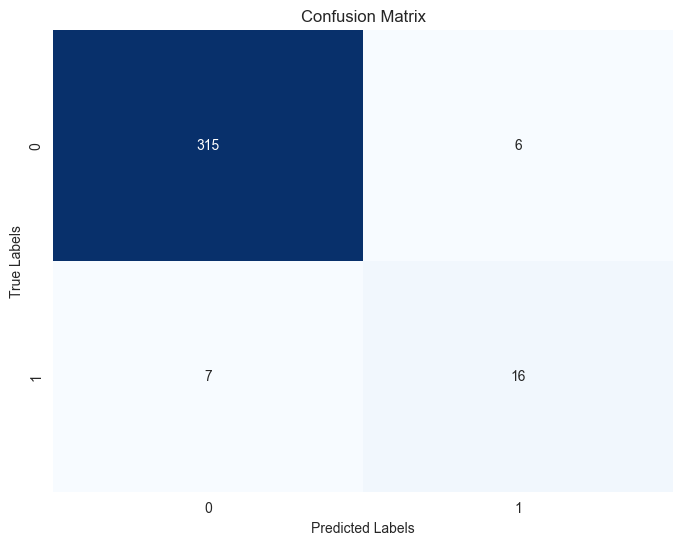

In [17]:
confusion_matrix_heatmap(y_test, y_pred)

# SA with ReliefF

In [18]:
best_solution, best_Gfitness = simulated_annealing(X, y, initial_temperature=0.1, cooling_rate=cooling_rate,max_iter=max_iter ,fitness_function=mutual_information_eval)
SARFFeatures = X.columns[best_solution.astype(bool)].tolist()

In [19]:
NB.fit(X_train[SARFFeatures], y_train)
y_pred = NB.predict(X_test[SARFFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9418604651162791
Precision: 0.5454545454545454
Recall: 0.782608695652174
F1: 0.6428571428571429
AUC: 0.8679398618447786


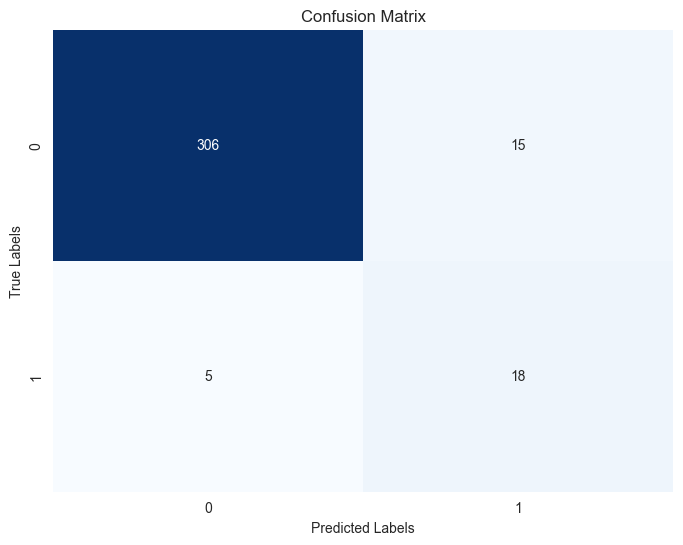

In [20]:
confusion_matrix_heatmap(y_test, y_pred)

In [21]:
DT.fit(X_train[SARFFeatures], y_train)
y_pred = DT.predict(X_test[SARFFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9680232558139535
Precision: 0.8
Recall: 0.6956521739130435
F1: 0.7441860465116279
AUC: 0.8415955573615062


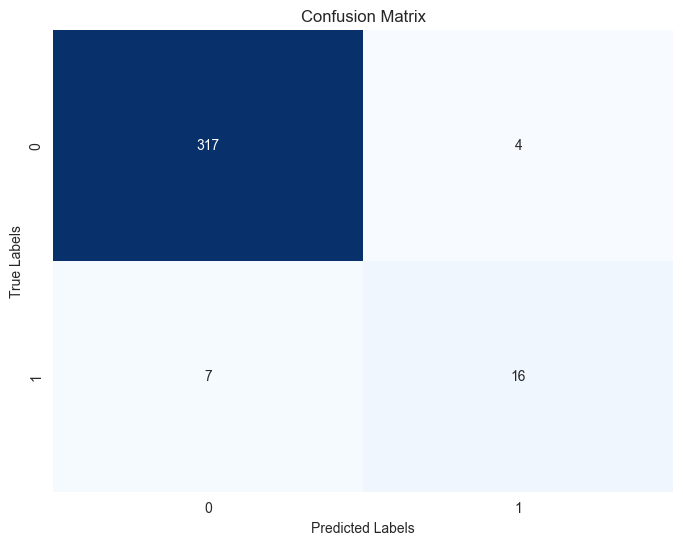

In [22]:
confusion_matrix_heatmap(y_test, y_pred)

## Red Neuronal


In [23]:
print("Features selected by MI: ", len(SAMIFeatures))
print("Features selected by X2: ", len(SAX2Features))
print("Features selected by ReliefF: ", len(SARFFeatures))

Features selected by MI:  60
Features selected by X2:  60
Features selected by ReliefF:  60


In [24]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

MUTUAL_INFORMATION 

In [25]:

RN = Sequential()

input_dim = X_train[SAMIFeatures].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

history = RN.fit(X_train[SAMIFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[SAMIFeatures], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[SAMIFeatures])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))
add_result("Neural Network", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))

Epoch 1/100


C:\Users\Randall\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


20/20 [==============================] - 0s 7ms/step - loss: 0.4116 - accuracy: 0.8969 - val_loss: 0.2775 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8984 - val_loss: 0.2482 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2563 - accuracy: 0.8984 - val_loss: 0.2164 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.8984 - val_loss: 0.1825 - val_accuracy: 0.9255
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9328 - val_loss: 0.1555 - val_accuracy: 0.9317
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1404 - accuracy: 0.9438 - val_loss: 0.1267 - val_accuracy: 0.9441
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.9484 - val_loss: 0.1151 - val_accuracy: 0.9441
Epoch 8/100
20/20 [======

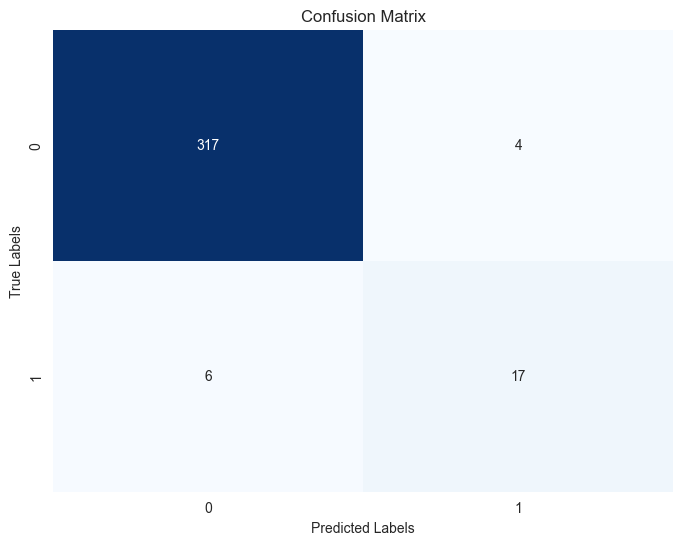

In [26]:
confusion_matrix_heatmap(y_test, y_pred)

CHI2

In [27]:

RN = Sequential()

input_dim = X_train[SAX2Features].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

history = RN.fit(X_train[SAX2Features], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[SAX2Features], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[SAX2Features])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))
add_result("Neural Network", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))

Epoch 1/100


C:\Users\Randall\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


20/20 [==============================] - 1s 6ms/step - loss: 0.5559 - accuracy: 0.7859 - val_loss: 0.3724 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8984 - val_loss: 0.2662 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2734 - accuracy: 0.8984 - val_loss: 0.2297 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2182 - accuracy: 0.9078 - val_loss: 0.1872 - val_accuracy: 0.9255
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1723 - accuracy: 0.9250 - val_loss: 0.1554 - val_accuracy: 0.9317
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9500 - val_loss: 0.1415 - val_accuracy: 0.9379
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1269 - accuracy: 0.9531 - val_loss: 0.1236 - val_accuracy: 0.9503
Epoch 8/100
20/20 [======

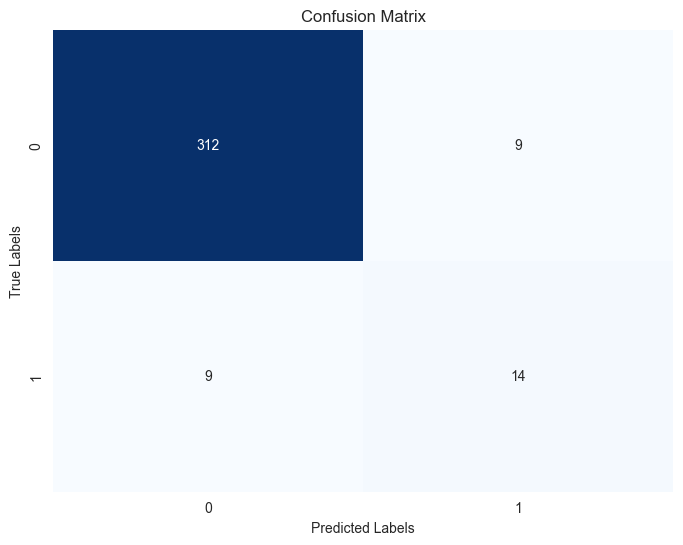

In [28]:
confusion_matrix_heatmap(y_test, y_pred)

RELIEFF

In [29]:
RN = Sequential()

input_dim = X_train[SARFFeatures].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

history = RN.fit(X_train[SARFFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[SARFFeatures], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[SARFFeatures])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))
add_result("Neural Network", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))

Epoch 1/100


C:\Users\Randall\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


20/20 [==============================] - 0s 5ms/step - loss: 0.4801 - accuracy: 0.8625 - val_loss: 0.3123 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8984 - val_loss: 0.2600 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2532 - accuracy: 0.8984 - val_loss: 0.2183 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1940 - accuracy: 0.9172 - val_loss: 0.1732 - val_accuracy: 0.9317
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1455 - accuracy: 0.9484 - val_loss: 0.1424 - val_accuracy: 0.9379
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1190 - accuracy: 0.9594 - val_loss: 0.1215 - val_accuracy: 0.9503
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1033 - accuracy: 0.9641 - val_loss: 0.1098 - val_accuracy: 0.9565
Epoch 8/100
20/20 [======

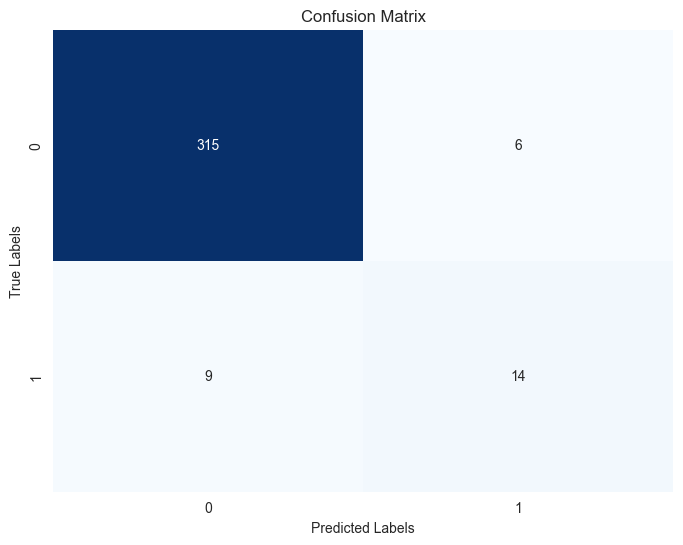

In [30]:
confusion_matrix_heatmap(y_test, y_pred)

In [31]:
display_tables()

,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.930233,0.486486,0.782609,0.6,0.861709
X2,0.93314,0.5,0.782609,0.610169,0.863267
Relief,0.94186,0.545455,0.782609,0.642857,0.86794


Random Forest Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.97093,0.842105,0.695652,0.761905,0.843153
X2,0.962209,0.727273,0.695652,0.711111,0.83848
Relief,0.968023,0.8,0.695652,0.744186,0.841596


Neural Network Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.97093,0.809524,0.73913,0.772727,0.977651
X2,0.947674,0.608696,0.608696,0.608696,0.970202
Relief,0.956395,0.7,0.608696,0.651163,0.975349
